In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [14]:
rng = np.random.default_rng(seed = 42)
mus = np.array([[-3,3],
                [3,-3],
                [3,3]])
mus

array([[-3,  3],
       [ 3, -3],
       [ 3,  3]])

In [15]:
cov = np.eye(2)
cov

array([[1., 0.],
       [0., 1.]])

In [16]:
n = 60
xvals = [rng.multivariate_normal(mus[i] , cov , size = n//3) for i in range(3)]

In [17]:
print(len(xvals))
print(xvals)

3
[array([[-2.69528292,  1.96001589],
       [-2.2495488 ,  3.94056472],
       [-4.95103519,  1.69782049],
       [-2.8721596 ,  2.68375741],
       [-3.01680116,  2.14695607],
       [-2.12060203,  3.77779194],
       [-2.9339693 ,  4.12724121],
       [-2.53249066,  2.14070754],
       [-2.63124922,  2.0411174 ],
       [-2.1215497 ,  2.95007409],
       [-3.18486236,  2.31907046],
       [-1.77745866,  2.84547052],
       [-3.42832782,  2.64786645],
       [-2.46769081,  3.36544406],
       [-2.58726739,  3.430821  ],
       [-0.8583524 ,  2.59358498],
       [-3.51224273,  2.18622727],
       [-2.38402058,  4.12897229],
       [-3.11394746,  2.15984352],
       [-3.82448122,  3.65059279]]), array([[ 3.74325417, -2.45684573],
       [ 2.33449029, -2.76783868],
       [ 3.11668581, -2.7813114 ],
       [ 3.87142878, -2.77640445],
       [ 3.67891356, -2.93242093],
       [ 3.2891194 , -2.36871177],
       [ 1.54284418, -3.31967122],
       [ 2.52962735, -3.63887785],
       [ 2.7248

In [18]:
X = np.concatenate(xvals , axis = 0).T
X.shape

(2, 60)

## dataset

In [22]:
df = pd.DataFrame(X)
df

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,-2.695283,-2.249549,-4.951035,-2.872160,-3.016801,-2.120602,-2.933969,-2.532491,-2.631249,-2.121550,...,2.621837,2.643736,2.066382,2.049978,3.840308,3.434424,2.405850,3.072130,3.232676,4.601779
1,1.960016,3.940565,1.697820,2.683757,2.146956,3.777792,4.127241,2.140708,2.041117,2.950074,...,4.299228,3.737516,2.794562,2.660967,1.272680,3.237736,1.553942,2.470507,3.021852,2.760644


## Visualize the dataset

(-5.428675892652574, 5.079419595319653, -4.5549129895929585, 4.720854073375543)

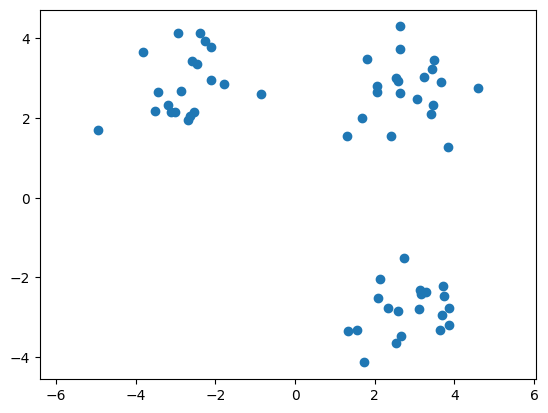

In [26]:
plt.scatter(X[0 , :] , X[1 , :])
plt.axis('equal')

## step 1 initailization

In [27]:
k = 3
d , n  = X.shape
ind = rng.choice(np.arange(n) , size = k , replace = False) 
#genrate k numbers without repitation

In [28]:
ind

array([36, 45,  4])

In [ ]:
mus = X[: , ind] # means or centroid
mus

array([[ 2.08054771,  3.66538511, -3.01680116],
       [-2.50283926,  2.90151452,  2.14695607]])

In [31]:
mus.shape

(2, 3)

## step2 cluster assignment

In [34]:
z = np.zeros(n)
for i in range(n):
    dist = np.linalg.norm(mus -X[:,i].reshape(d,1))
    axis = 0
z[i] =  np.argmin(dist)